### Computer Vision

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Load the Fashion MNIST dataset: is a collection of grayscale 28*28 pixel clothing images. Each image is associated with 
a label

In [7]:
## LOad the Fashion MNIST dataset
fmist = tf.keras.datasets.fashion_mnist
y= fmist.load_data()

In [15]:
len(y[0])

2

In [8]:
## Load the training and test split of the fashion mnist dataset
(training_images, training_labels), (test_images, test_labels)= fmist.load_data()

In [54]:
x=[training_images, training_labels, test_images, test_labels]
for i in x:
    
    print(f'length of i :{len(i)}')

length of i :60000
length of i :60000
length of i :10000
length of i :10000


 What do these values look like??

the index is 0
LABEL: 9

IMAGE: PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0 

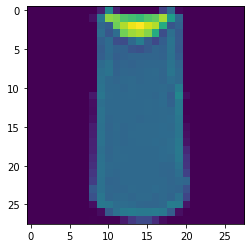

In [56]:
import numpy as np
import matplotlib.pyplot as plt
index=[0,2]
np.set_printoptions(linewidth=320)
for i in index:
    print(f'the index is {i}')
    print(f'LABEL: {training_labels[i]}')
    print(f'\nIMAGE: PIXEL ARRAY:\n {training_images[i]}')

    plt.imshow(training_images[i])

In [9]:
## notice all the values are between 0 and 255, so scale the values between 0 and 1.

# Normalize the pixel values of the training and test images
training_images = training_images/255.0
test_images = test_images/255.0

### Build the classifiction model


In [107]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation= tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation =tf.nn.softmax)])

 Sequential: define the sequence of layers 
flatten = our image is 28 * 28 matrix, flatten convert it into one dimensionsl array
dense = add layers of neurons
Each layer of neurons need an activation function to tell them what to do. There are lot of options. But
ReLu : if x>0:
        return x
       else:
            return 0
it means, it only passes the value grater than 0 to the next layer
softmax : takes a list of values and scales these so that the sum of all elements will be equal to 1. 

In [64]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print (f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [65]:
## feed the inputs to the softmax activation functio
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function : {outputs.numpy()}')

output of softmax function : [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [66]:
# get the sum of all the values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

sum of outputs: 1.0


In [67]:
## get the index with highest value
prediction = np.argmax(outputs)
print(f'the class with highest probability : {prediction}')

the class with highest probability : 2


In [108]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3761 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3361 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3139 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2953 - accuracy: 0.8916


In [109]:
## evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 824us/step - loss: 0.3572 - accuracy: 0.8738


[0.3572034537792206, 0.8737999796867371]

In [110]:
classifications =model.predict(test_images)

313/313 [==============================] - 0s 712us/step


In [112]:
print(classifications[0])

[5.2124478e-06 2.3055108e-08 2.8850113e-07 3.2583733e-07 6.7807696e-07 3.9944309e-03 3.7647328e-06 9.2553450e-03 1.1938173e-05 9.8672801e-01]


In [113]:
print(test_labels[0])

9


In [114]:
np.argmax(classifications[0])

9

 # Using Callbacks to control Training

 We use callbacks api to stop training when specified metric is met. This is useful feature so we don't need 
    to complete all epochs when threshold is rached. 

#### Creating a callback class
We can create a callback by defining a class that inherits the tf.keras.callbacks.Callback base class. From there we can define available
methods to set where the call back will be executed ( example of method = on_epoch_end() to check the loss at each training epoch)

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training after reaching 60 percent accuracy
        Args:
        epoch(integer)-index of epoch (required but not used in the function definition below)
        logs (dict)-metric result from the training epoch
        
        
        '''
        #check accuracy
#         if(logs.get('accuracy')>0.85 ):
#             #stop if threshold is met
#             #print('\nLoss is lower than 0.4 so cancelling training!')
#             print('\naccuracy threshold is reached so cancelling training!')
#             self.model.stop_training =True
        if((logs.get('accuracy')>0.95) | (logs.get('loss')<0.35)  ):
            #stop if threshold is met
            #print('\nLoss is lower than 0.4 so cancelling training!')
            print('\n threshold is reached so cancelling training!')
            self.model.stop_training =True
# Instantiate class
callbacks= myCallback()

In [28]:
# Define and compile the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf.optimizers.Adam(),
             loss ="sparse_categorical_crossentropy",
             metrics =['accuracy'])

In [29]:
## Train the model
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4721 - accuracy: 0.8324
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3569 - accuracy: 0.8689
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.3219 - accuracy: 0.8811
 threshold is reached so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3220 - accuracy: 0.8810


In [ ]:
### challenge modify the code to make the training stop when the accuracy metric exeeds 60%
